In [1]:
import yfinance as yf
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib as plt

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

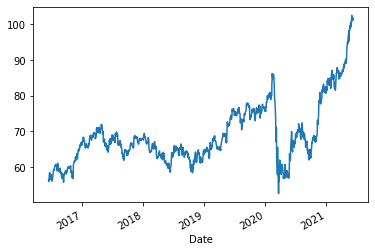

In [3]:
start = dt.date.today() - dt.timedelta(1825)
end = dt.date.today()

ohlcv = yf.download("CBA.ax", start, end)
ohlcv["Adj Close"].plot()

### Bollinger Bands

<AxesSubplot:xlabel='Date'>

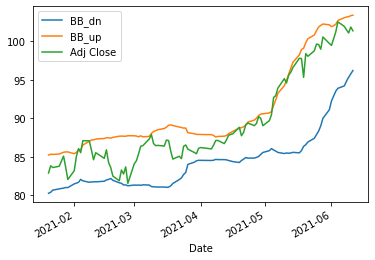

In [4]:
dftr = ohlcv.copy()

def ATR(DF, n):
    dftr = ohlcv.copy()
    dftr['H-L'] = abs(dftr['High'] - dftr['Low']) 
    dftr['H-PC'] = abs(dftr['High'] - dftr['Close'].shift(1))
    dftr['L-PC'] = abs(dftr['Low'] - dftr['Close'].shift(1)) 
    dftr['TR'] = dftr[['H-L', 'H-PC', 'L-PC']].max(axis=1, skipna=False)
    dftr['ATR'] = dftr['TR'].rolling(n).mean()
    dfATR = dftr['ATR']
    return dfATR
    
ATR(ohlcv, 20)

def BollingerBand(DF, n):
    dfBB = ohlcv.copy()
    dfBB["MA"] = dfBB['Adj Close'].rolling(n).mean()
    dfBB["BB_up"] = dfBB["MA"] + 2*dfBB["Adj Close"].rolling(n).std()
    dfBB["BB_dn"] = dfBB["MA"] - 2*dfBB["Adj Close"].rolling(n).std()
    return dfBB

BollingerBand(ohlcv, 20).iloc[-100:,[-1, -2, -5]].plot()

### MACD

In [7]:
ma = ohlcv.copy()

def MACD(ma_df, x, y, z):
    ma["Fast"] = ohlcv["Adj Close"].ewm(span=x, min_periods=x).mean()
    ma["Slow"] = ohlcv["Adj Close"].ewm(span=y, min_periods=y).mean()
    ma["MACD"] = ma["Fast"] - ma["Slow"]
    ma["Signal"] = ma["MACD"].ewm(span=z, min_periods=z).mean()
    ma.dropna(inplace=True)
    return ma

<AxesSubplot:xlabel='Date'>

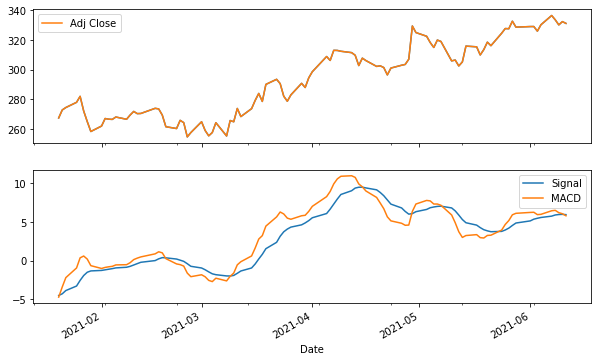

In [8]:
df_macd = MACD(ohlcv, 12, 26, 9)

f, (ax1, ax2) = plt.pyplot.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))
ax1.plot(MACD(ohlcv, 12, 26, 9).iloc[-100:,[-6]])

df_macd.iloc[-100:,[-6]].plot(ax=ax1)
df_macd.iloc[-100:,[-1,-2]].plot(ax=ax2)

### RSI

In [9]:
dfrsi = ohlcv.copy()

def RSI(DF, n):
    dfrsi['delta'] = dfrsi['Adj Close'] - dfrsi['Adj Close'].shift(1)
    dfrsi['gain'] = np.where(dfrsi['delta']>=0, dfrsi['delta'], 0)
    dfrsi['loss'] = np.where(dfrsi['delta']<0, abs(dfrsi['delta']), 0)
    avg_gain = [] 
    avg_loss = []
    gain = dfrsi['gain'].tolist()
    loss = dfrsi['loss'].tolist()
    for items in range(len(dfrsi)):
        if items < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif items == n:
            avg_gain.append(dfrsi['gain'].rolling(n).mean().tolist()[n]) 
            avg_loss.append(dfrsi['loss'].rolling(n).mean().tolist()[n])
        elif items > n:
            avg_gain.append(((n-1)*avg_gain[items-1] + gain[items])/n) 
            avg_loss.append(((n-1)*avg_loss[items-1] + loss[items])/n) 
    dfrsi['avg_loss'] = np.array(avg_loss)
    dfrsi['avg_gain'] = np.array(avg_gain)
    dfrsi['RSI'] = 100 - (100 / (1 + (dfrsi['avg_gain']/dfrsi['avg_loss'])))
    return dfrsi['RSI']

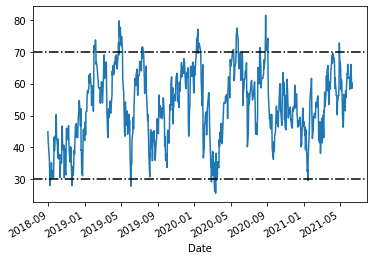

In [10]:
RSI_Plot = RSI(ohlcv, 14).iloc[-700:,].plot()
RSI_Plot.axhline(70, linestyle='-.', color='black')
RSI_Plot.axhline(30, linestyle='-.', color='black')

# TA-Lib

In [11]:
import talib

In [13]:
list(talib.get_function_groups())

['Cycle Indicators',
 'Math Operators',
 'Math Transform',
 'Momentum Indicators',
 'Overlap Studies',
 'Pattern Recognition',
 'Price Transform',
 'Statistic Functions',
 'Volatility Indicators',
 'Volume Indicators']

In [14]:
talib.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

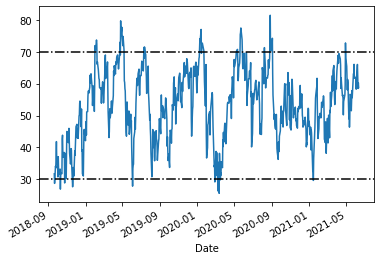

In [18]:
df_talib = ohlcv.copy()

RSI = talib.RSI(df_talib['Adj Close'].iloc[-700:,], timeperiod=14)
TAlib_RSI_Plot = RSI.plot()
TAlib_RSI_Plot.axhline(70, linestyle='-.', color='black')
TAlib_RSI_Plot.axhline(30, linestyle='-.', color='black')